<h1>Reinforcement Learning</h1>

<u>Trying to learn RL as a part of SOS</u>
<br>
First problem is Multi-Armed Bandits
<br>
MAB is a problem in which a multi armed bandit is operating multiple slot machines and 
the player has to decide which slot machine to play in order to maximize the reward.
<br>
1. ***Greedy Action***: Choosing the action that gives the maximum reward w/o considering the future rewards => Exploitation
<br>
2. ***Exploration***: Choosing the action that gives the maximum reward considering the future rewards
<br>
->***Epsilon Greedy***: A strategy that chooses the greedy action with probability 1-epsilon and chooses a random action with probability epsilon
<br>
->Softmax: A strategy that chooses the action with probability proportional to the exponential of the expected reward of the action
<br>
->Upper Confidence Bound: A strategy that chooses the action with the maximum upper confidence bound
<br>
->Thompson Sampling: A strategy that chooses the action with the maximum probability of being the best action
<br>
->UCB1: A strategy that chooses the action with the maximum upper confidence bound <br>
->UCBl: log factor  <br>
->UCBt: time factor <br>
->UCBv: variance factor <br>
->UCBp: probability factor <br>
->UCBh: heuristic factor <br>
->UCBc: complexity factor <br>
->UCBm: margin factor <br>
->UCBd: discount factor <br>
->UCBs: scaling factor <br>
->UCBf: fuency factor <br>
->UCBn: noise factor <br>
->UCBw: maximum upper confidence bound with a width factor <br>
->UCBk: maximum upper confidence bound with a kernel factor <br>
->UCBq: maximum upper confidence bound with a quantile factor <br>
->UCBz: maximum upper confidence bound with a zeta factor <br>
->UCBx: maximum upper confidence bound with a xi factor <br>
->UCBy: maximum upper confidence bound with a psi factor <br>
->UCBj: maximum upper confidence bound with a jitter factor <br>
->UCBg: maximum upper confidence bound with a gamma factor <br>
->UCBb: maximum up per confidence bound with a beta factor <br>


In [2]:
#10 Armed testbed

#imports
import numpy as np
import matplotlib.pyplot as plt
import math

## $\epsilon$-Greedy Method

In this file , I will only explore epsilon greedy method, different files for other methods<br>
*List of all variables and constants defined for the test suite*
<ul><li> k is the number of arms, here 10
<li>stdDev is the spread at which the MAB choose their reward from the mean
<li>epsilon is the possibility of the agent exploring the env instead of carrying on exploitation
<li>N is the total number of trials
<li>trueActionVals is the array containing true action values for each of the k arms (=>k actions)
<li>trueVals is the array of true action values of a specific arm (action)
</ul>
<br>
-> runMAB function
<br><ul><li>reward: received every trial
<li>Q_estT: estimated values per action
<li>f: number of times each action is chosen
</ul>

In [48]:
#defining constants
k=10
N=2000
#first is purely exploitative then generally going towards explorative
eps=[0,0.01,0.1,0.9,1]
std_dev=1
#initialising the values of all arm
trueActionVals = []
for i in range(k):
    trueActionVals.append(np.random.random()*4 - 2)
trials=np.zeros((k,N))
#initialising the true action value array of each arm for each trial
for i in range(k):
    trueVal=trueActionVals[i]
    trials[i]=np.random.normal(trueVal,std_dev,N)

In [49]:
def runMAB(epsilon):
    #running trials with epsilon
    reward=np.zeros(N)
    Q_estT=np.zeros(k)
    f=np.zeros(k)
    index=np.zeros(N)
    for i in range(N):
        if np.random.random()>epsilon:
            action=np.argmax(Q_estT) #choose the greedy action
            #print(action)
            r=trials[action][i]
            reward[i]=reward[i-1]+r #updating the reward
            f[action]+=1
            Q_estT[action]=Q_estT[action]+(r-Q_estT[action])/f[action]
        else:
            action=math.floor(np.random.random()*k)
            # print(action)
            r=trials[action][i]
            reward[i]=reward[i-1]+r
            f[action]+=1
            Q_estT[action]=Q_estT[action]+(r-Q_estT[action])/f[action]
        index[i]=action
    return reward

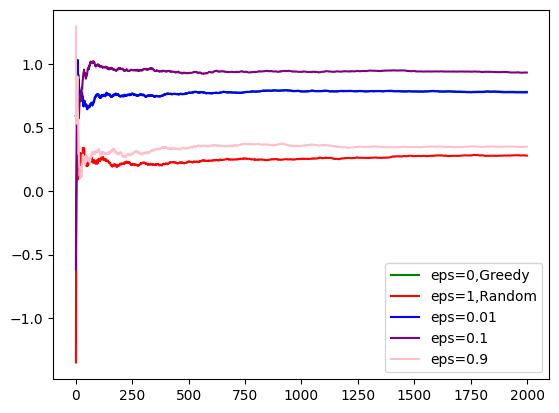

In [70]:
maxAvgRew=(np.arange(N)+1)*np.max(trueActionVals)
plt.figure(dpi=100)
plt.plot(np.arange(N),runMAB(eps[0])/maxAvgRew,color='green')
plt.plot(np.arange(N),runMAB(eps[4])/maxAvgRew,color='red')
plt.plot(np.arange(N),runMAB(eps[1])/maxAvgRew,color='blue')
plt.plot(np.arange(N),runMAB(eps[2])/maxAvgRew,color='purple')
plt.plot(np.arange(N),runMAB(eps[3])/maxAvgRew,color='pink')
plt.legend(['eps=0,Greedy','eps=1,Random','eps=0.01','eps=0.1','eps=0.9'])
# plt.xlabel('Trials')
# plt.ylabel('Reward as fraction \n of the optimal action\'s reward')
plt.show()

The above plot is to show the behaviour of the $\epsilon$ greedy method with the variation of epsilon.
<br>PS: Try to vary k and see how the best epsilon changes
<br>Now let's try to find the best epsilon

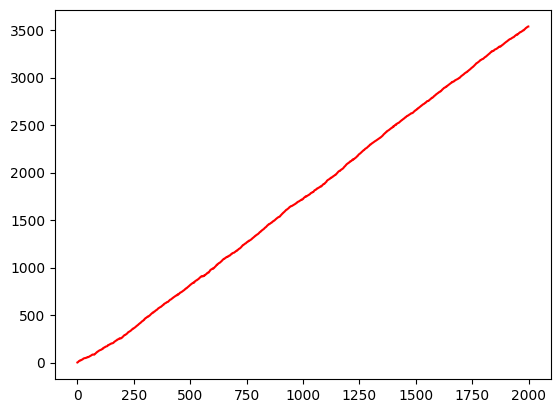

In [55]:
#not needed just seeing something
plt.figure(dpi=100)
plt.plot(np.arange(N),runMAB(0.1),color='red')
plt.show()

#Change the expressions after you are done experimenting with the code
cumRew=np.zeros(100)
possEps=np.arange(100)*1/100
for i in range(100):
    reward=runMAB(possEps[i])
    cumRew[i]=reward[N-1]/N
plt.figure(dpi=100)
plt.plot(possEps,cumRew)
plt.scatter(np.argmax(cumRew)*100,np.max(cumRew))
plt.xlim(-.05,1.05)
plt.xlabel('Epsilon')
plt.ylabel('Cumulative reward metric')
plt.show()
print("The best epsilon value is ",np.argmax(cumRew)*1/100)

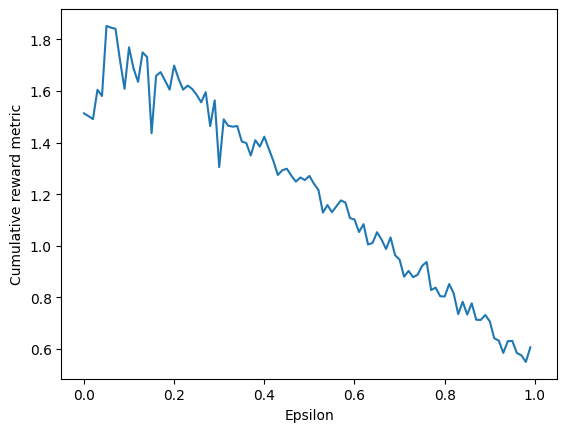

The best epsilon value is  0.05


In [69]:
#Change the expressions after you are done experimenting with the code 
cumRew=np.zeros(100) 
possEps=np.arange(100)*1/100 
for i in range(100): 
    reward=runMAB(possEps[i]) 
    cumRew[i]=reward[N-1]/N 
plt.figure(dpi=100) 
plt.plot(possEps,cumRew) 
plt.scatter(np.argmax(cumRew)*100,np.max(cumRew)) 
plt.xlim(-.05,1.05) 
plt.xlabel('Epsilon') 
plt.ylabel('Cumulative reward metric') 
plt.show() 
print("The best epsilon value is ",np.argmax(cumRew)*1/100)